# ROC curves
## Comparison of different trainings with different setups for inference

In [9]:
import numpy as np

import matplotlib.pyplot as plt
import mplhep as hep


plt.style.use(hep.cms.style.ROOT)
plt.rcParams['axes.axisbelow'] = True

In [10]:
model_names = ['nominal', 'adversarial']
prediction_setups = ['', '_FGSM']
prediction_files = 'outfiles'
tagger = 'DF_Run2'
dirz = [[f'/eos/user/h/heschone/DeepJet/Train_{tagger}/{model_name}/predict{prediction_setup}/' \
        for model_name in model_names] for prediction_setup in prediction_setups]
save_dir = f'/eos/user/h/heschone/DeepJet/Plots/'

In [11]:
dirz

[['/eos/user/h/heschone/DeepJet/Train_DF_Run2/nominal/predict/',
  '/eos/user/h/heschone/DeepJet/Train_DF_Run2/adversarial/predict/'],
 ['/eos/user/h/heschone/DeepJet/Train_DF_Run2/nominal/predict_FGSM/',
  '/eos/user/h/heschone/DeepJet/Train_DF_Run2/adversarial/predict_FGSM/']]

In [12]:
NEW_BvsL_paths = [item + f'BvL_{prediction_files}_NEW.npy' for sublist in dirz for item in sublist]
NEW_CvsB_paths = [item + f'CvB_{prediction_files}_NEW.npy' for sublist in dirz for item in sublist]
NEW_CvsL_paths = [item + f'CvL_{prediction_files}_NEW.npy' for sublist in dirz for item in sublist]

In [13]:
NEW_BvsL_paths
NEW_CvsB_paths
NEW_CvsL_paths

['/eos/user/h/heschone/DeepJet/Train_DF_Run2/nominal/predict/CvL_outfiles_NEW.npy',
 '/eos/user/h/heschone/DeepJet/Train_DF_Run2/adversarial/predict/CvL_outfiles_NEW.npy',
 '/eos/user/h/heschone/DeepJet/Train_DF_Run2/nominal/predict_FGSM/CvL_outfiles_NEW.npy',
 '/eos/user/h/heschone/DeepJet/Train_DF_Run2/adversarial/predict_FGSM/CvL_outfiles_NEW.npy']

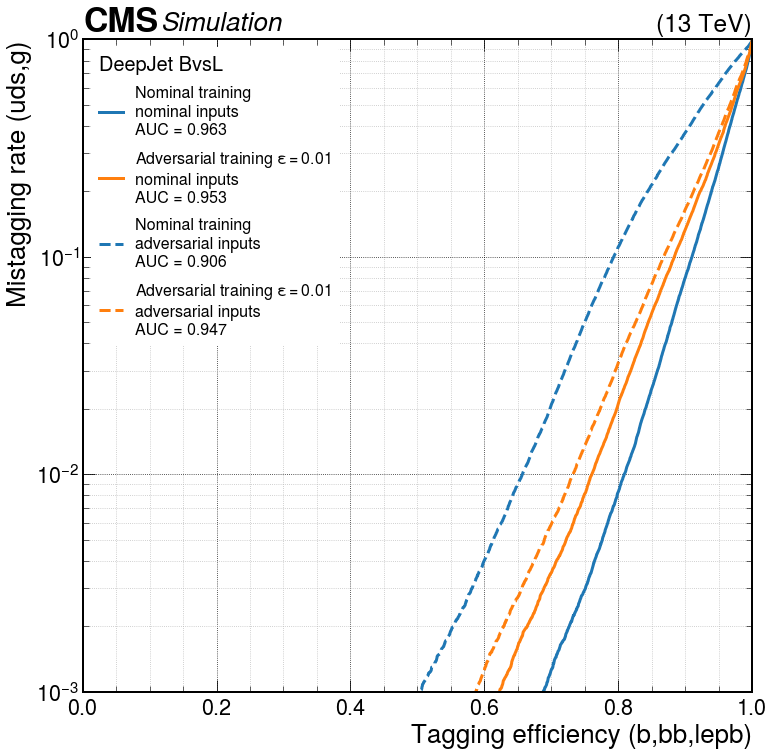

In [14]:
# BvsL
fig,ax = plt.subplots(figsize=[12,12])
ax.set_xlim(left=0.,right=1)
ax.set_yscale('log')
ax.set_ylim(bottom=1e-3)
ax.set_ylim(top=1)

tag_name = ' (b,bb,lepb)'
mistag_name = ' (uds,g)'

ax.set_ylabel('Mistagging rate'+mistag_name)
ax.set_xlabel('Tagging efficiency'+tag_name)
ax.grid(which='minor', alpha=0.85)
ax.grid(which='major', alpha=0.95, color='black')

linestyles = ['-','-','--','--']
colors = ['tab:blue','tab:orange','tab:blue','tab:orange',]
names_models = ['Nominal training', r'Adversarial training $\epsilon=0.01$']
names_setups = ['nominal inputs', r'adversarial inputs']
legtitle = 'BvsL'
legloc = 'upper left'
for i in range(4):
    xya = np.load(NEW_BvsL_paths[i], allow_pickle=True)
    legend_text = names_models[i % 2] + '\n' + (names_setups[0] if i<2 else names_setups[1]) + '\n' + 'AUC = ' + f'{xya[2]:.3f}'
    ax.plot(xya[0], xya[1], linestyle=linestyles[i], color=colors[i],linewidth=3.0,label=legend_text)
leg = ax.legend(title='DeepJet '+legtitle,loc=legloc,fontsize=16,title_fontsize=20,labelspacing=0.7,frameon=True,framealpha=1,facecolor='white')
if 'right' in legloc:
    aligned = 'right'
else:
    aligned = 'left'
leg._legend_box.align = aligned
leg.get_frame().set_linewidth(0.0)
hep.cms.label(rlabel='(13 TeV)')
fig.savefig(legtitle + '_' + tagger + '_NEW_ROC_v2.pdf', bbox_inches='tight')
fig.savefig(save_dir + legtitle + '_' + tagger + '_NEW_ROC_v2.pdf', bbox_inches='tight')
#fig.savefig(legtitle + '_' + tagger + '_NEW_ROC_v2.png', bbox_inches='tight', dpi=900, facecolor='w', transparent=False)

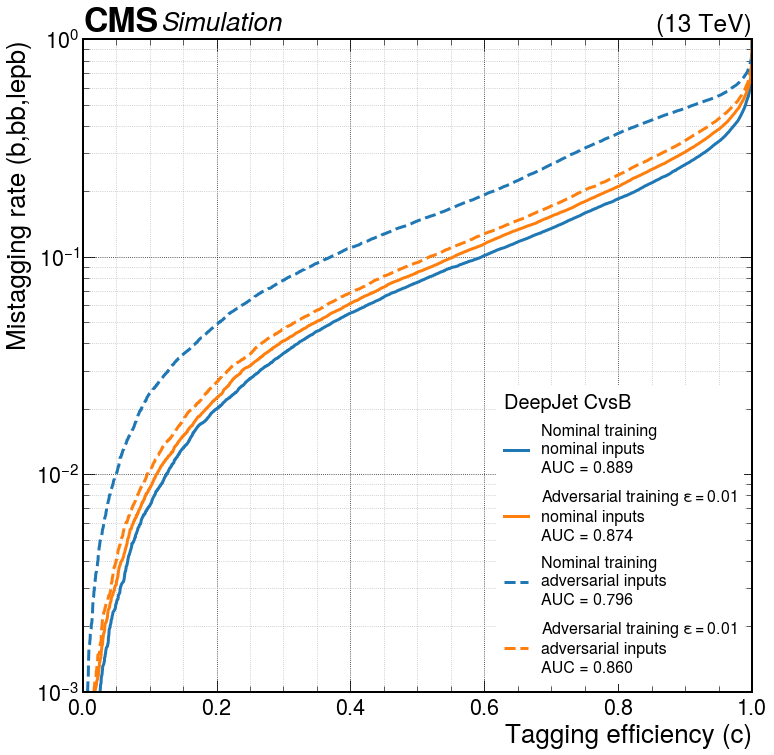

In [15]:
# CvsB
fig,ax = plt.subplots(figsize=[12,12])
ax.set_xlim(left=0.,right=1)

ax.set_yscale('log')
ax.set_ylim(bottom=1e-3)
ax.set_ylim(top=1)

tag_name = ' (c)'
mistag_name = ' (b,bb,lepb)'

ax.set_ylabel('Mistagging rate'+mistag_name)
ax.set_xlabel('Tagging efficiency'+tag_name)

ax.grid(which='minor', alpha=0.85)
ax.grid(which='major', alpha=0.95, color='black')

linestyles = ['-','-','--','--']
colors = ['tab:blue','tab:orange','tab:blue','tab:orange',]
names_models = ['Nominal training', r'Adversarial training $\epsilon=0.01$']
names_setups = ['nominal inputs', r'adversarial inputs']
legtitle = 'CvsB'
legloc = 'lower right'
for i in range(4):
    xya = np.load(NEW_CvsB_paths[i], allow_pickle=True)
    legend_text = names_models[i % 2] + '\n' + (names_setups[0] if i<2 else names_setups[1]) + '\n' + 'AUC = ' + f'{xya[2]:.3f}'
    ax.plot(xya[0], xya[1], linestyle=linestyles[i], color=colors[i],linewidth=3.0,label=legend_text)
leg = ax.legend(title='DeepJet '+legtitle,loc=legloc,fontsize=16,title_fontsize=20,labelspacing=0.7,frameon=True,framealpha=1,facecolor='white')
if 'right' in legloc:
    aligned = 'left'#'right'
else:
    aligned = 'left'
leg._legend_box.align = aligned
leg.get_frame().set_linewidth(0.0)
hep.cms.label(rlabel='(13 TeV)')
fig.savefig(legtitle + '_' + tagger + '_NEW_ROC_v2.pdf', bbox_inches='tight')
fig.savefig(save_dir + legtitle + '_' + tagger + '_NEW_ROC_v2.pdf', bbox_inches='tight')
#fig.savefig(legtitle + '_' + tagger + '_NEW_ROC_v2.png', bbox_inches='tight', dpi=900, facecolor='w', transparent=False)

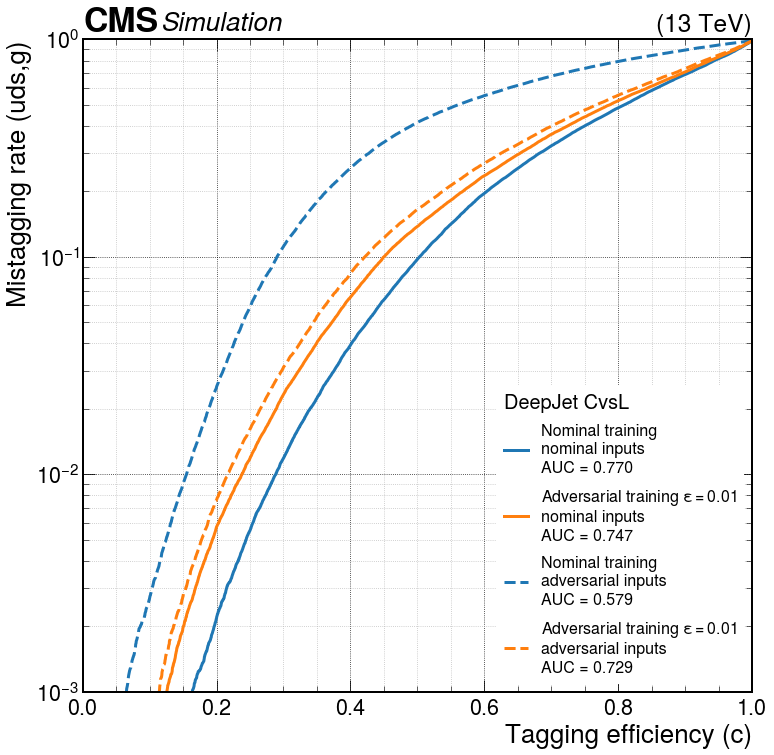

In [16]:
# CvsL
fig,ax = plt.subplots(figsize=[12,12])
ax.set_xlim(left=0.,right=1)
ax.set_yscale('log')
ax.set_ylim(bottom=1e-3)
ax.set_ylim(top=1)

tag_name = ' (c)'
mistag_name = ' (uds,g)'

ax.set_ylabel('Mistagging rate'+mistag_name)
ax.set_xlabel('Tagging efficiency'+tag_name)
ax.grid(which='minor', alpha=0.85)
ax.grid(which='major', alpha=0.95, color='black')

linestyles = ['-','-','--','--']
colors = ['tab:blue','tab:orange','tab:blue','tab:orange',]
names_models = ['Nominal training', r'Adversarial training $\epsilon=0.01$']
names_setups = ['nominal inputs', r'adversarial inputs']
legtitle = 'CvsL'
legloc = 'lower right'
for i in range(4):
    xya = np.load(NEW_CvsL_paths[i], allow_pickle=True)
    legend_text = names_models[i % 2] + '\n' + (names_setups[0] if i<2 else names_setups[1]) + '\n' + 'AUC = ' + f'{xya[2]:.3f}'
    ax.plot(xya[0], xya[1], linestyle=linestyles[i], color=colors[i],linewidth=3.0,label=legend_text)
leg = ax.legend(title='DeepJet '+legtitle,loc=legloc,fontsize=16,title_fontsize=20,labelspacing=0.7,frameon=True,framealpha=1,facecolor='white')
if 'right' in legloc:
    aligned = 'left'
else:
    aligned = 'left'
leg._legend_box.align = aligned
leg.get_frame().set_linewidth(0.0)
hep.cms.label(rlabel='(13 TeV)')
fig.savefig(legtitle + '_' + tagger + '_NEW_ROC_v2.pdf', bbox_inches='tight')
fig.savefig(save_dir + legtitle + '_' + tagger + '_NEW_ROC_v2.pdf', bbox_inches='tight')
#fig.savefig(legtitle + '_' + tagger + '_NEW_ROC_v2.png', bbox_inches='tight', dpi=900, facecolor='w', transparent=False)